#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf   # dickey fuller test for stationarity check
from statsmodels.tsa.arima.model import ARIMA    # ARMA/ARIMA
from pmdarima.arima import auto_arima  # ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose  # for seasonal decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # plot acf and pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX   # sarima/sarimax lib
import statsmodels.api as sm  # Ljung-Box-Test

import warnings  # ignore warnings
warnings.filterwarnings('ignore')

#### Loading the Data

In [2]:
df = pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls", index_col = 'Order Date', parse_dates = True)
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


#### Resample

In [3]:
df_resample = df.resample('M').mean()
df_resample

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,4381.974684,54965.784810,180.213861,3.594937,0.126582,31.015072
2014-02-28,5918.152174,66299.456522,98.258522,3.456522,0.176087,18.745835
2014-03-31,5551.433121,52958.840764,354.719803,3.726115,0.167516,3.176624
2014-04-30,5115.740741,57213.533333,209.595148,3.970370,0.110000,25.843224
2014-05-31,5014.000000,53260.688525,193.838418,3.819672,0.155328,22.448439
2014-06-30,3642.918519,50573.592593,256.260204,3.859259,0.172000,36.863144
2014-07-31,5219.601399,63260.062937,237.387364,3.846154,0.171678,-5.884494
2014-08-31,4766.673203,56394.679739,182.414827,3.980392,0.131046,34.758856
2014-09-30,4846.044776,54185.869403,305.139369,3.731343,0.159963,31.074998


In [4]:
df_m = df_resample.Sales
df_m

Order Date
2014-01-31    180.213861
2014-02-28     98.258522
2014-03-31    354.719803
2014-04-30    209.595148
2014-05-31    193.838418
2014-06-30    256.260204
2014-07-31    237.387364
2014-08-31    182.414827
2014-09-30    305.139369
2014-10-31    197.820082
2014-11-30    247.260115
2014-12-31    250.164103
2015-01-31    313.346131
2015-02-28    186.740797
2015-03-31    280.625014
2015-04-30    213.720053
2015-05-31    206.381414
2015-06-30    179.690522
2015-07-31    205.466607
2015-08-31    232.064982
2015-09-30    220.463884
2015-10-31    189.186286
2015-11-30    234.483221
2015-12-31    237.087092
2016-01-31    208.342596
2016-02-29    276.853193
2016-03-31    317.275307
2016-04-30    227.941406
2016-05-31    253.278791
2016-06-30    202.736352
2016-07-31    195.333149
2016-08-31    176.791899
2016-09-30    202.231474
2016-10-31    304.529311
2016-11-30    214.626935
2016-12-31    275.565463
2017-01-31    283.686284
2017-02-28    189.730219
2017-03-31    247.362827
2017-04-30    

#### Seasonal Decompose

In [5]:
temp = df_m.values

decom = seasonal_decompose(temp, period = 12)

d_trend = decom.trend
d_seasonal = decom.seasonal
d_residual = decom.resid

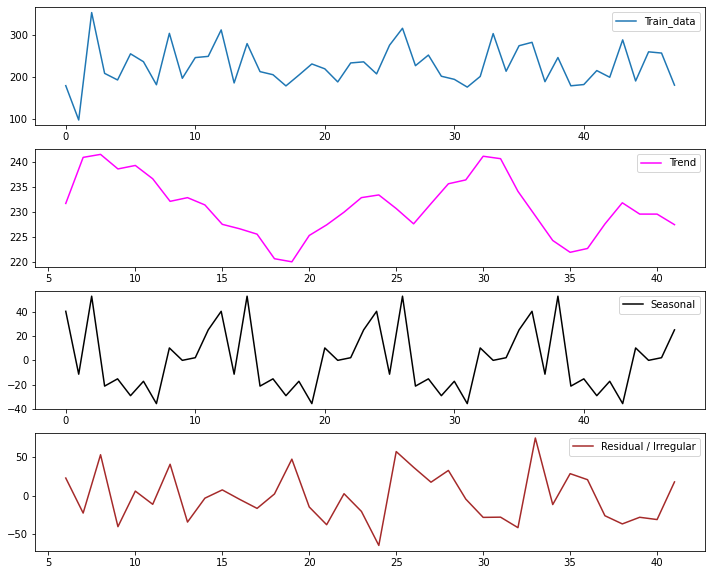

In [6]:
# Plot the components

fig, ax = plt.subplots(4,1, figsize = (12,10))

plt.subplot(411)
plt.plot(temp, label = 'Train_data')
plt.legend()

plt.subplot(412)
plt.plot(d_trend, label = 'Trend', color = "magenta")
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal, label = 'Seasonal', color = 'black')
plt.legend()

plt.subplot(414)
plt.plot(d_residual, label = 'Residual / Irregular', color = 'brown')
plt.legend()

#### Splitting

In [7]:
sd = int(len(df_m)*0.7)
train_part = df_resample[:sd]
test_part = df_resample[sd:]
print('train = {}, test = {}'.format(len(train_part), len(test_part)))

train = 33, test = 15


In [8]:
train = train_part.Sales
test = test_part.Sales
print('train = {}, test = {}'.format(len(train), len(test)))

train = 33, test = 15


#### Stationarity

In [9]:
def checkstationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        val = 'Data is Stationary. Proceed to moedl building'
    else:
        val = 'Data is not Stationary. Diff. the data before model building'
    return(val)

In [10]:
checkstationarity(train)

0.009835621537945706


'Data is Stationary. Proceed to moedl building'

In [11]:
checkstationarity(test)

0.06633413715929753


'Data is not Stationary. Diff. the data before model building'

#### Plotting ACF and PACF

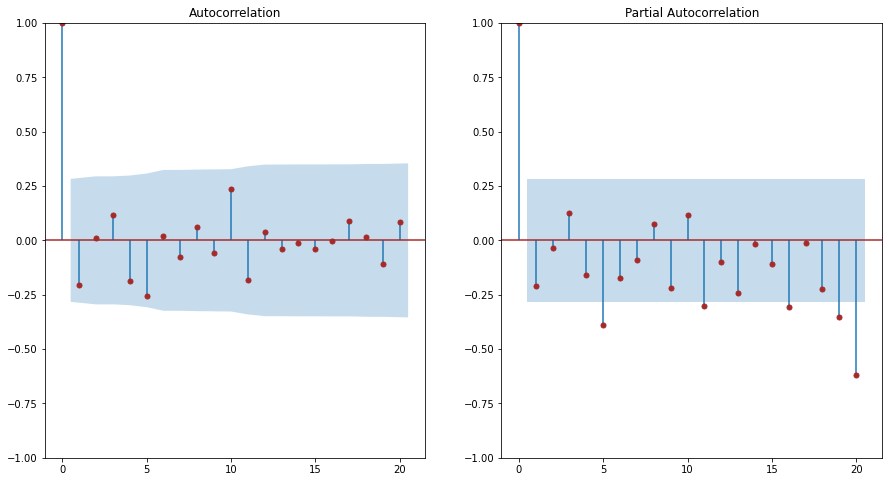

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

plot_acf(df_m, lags = 20, ax = ax[0], color = 'brown');
plot_pacf(df_m, lags = 20, ax = ax[1], color = 'brown');

In [13]:
# p = 0(1)
# q = 0,1,2,3,4,5(6)

#### ARMA and ARIMA Model

In [14]:
def fun(data,data1,p,d,q):
  
    train = pd.DataFrame(data)
    test = pd.DataFrame(data1)
    #print(test)
    m1 = ARIMA(train, order = (p,d,q)).fit()
    global aic1,bic1,mse1
    aic1, bic1 = m1.aic, m1.bic
    
    f1 = m1.predict(0,len(test)-1)
    actual = []
    pred = []
    for i in range(len(f1)):
        actual.append(test.Sales[i])
        pred.append(f1[i])
    df1 = pd.DataFrame({'actual':actual, 'predicted':pred})
    
    mse1 = mean_squared_error(df1.actual, df1.predicted)

    return aic1, bic1, mse1

In [15]:
p = [0]
d = [0]
q = [0,1,2,3,4,5]

for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            fun(train, test, p = p[i], d = d[j], q = q[k])
            print('p='+str(p[i])+'  d='+str(d[j])+'  q='+str(q[k])+' AIC = {}, BIC = {}'.format(aic1,bic1)+'  MSE = {} ,  Rmse = {}'.format(round(mse1,3),round(np.sqrt(mse1),3)))         

p=0  d=0  q=0 AIC = 355.0895506469015, BIC = 358.08256576983445  MSE = 1865.689 ,  Rmse = 43.194
p=0  d=0  q=1 AIC = 355.92873503179504, BIC = 360.4182577161945  MSE = 1952.454 ,  Rmse = 44.187
p=0  d=0  q=2 AIC = 357.885978452157, BIC = 363.87200869802297  MSE = 2087.353 ,  Rmse = 45.688
p=0  d=0  q=3 AIC = 358.44895830284054, BIC = 365.93149611017293  MSE = 2694.137 ,  Rmse = 51.905
p=0  d=0  q=4 AIC = 356.23021712105015, BIC = 365.20926248984904  MSE = 3991.092 ,  Rmse = 63.175
p=0  d=0  q=5 AIC = 353.4334246008641, BIC = 363.90897753112944  MSE = 2955.283 ,  Rmse = 54.363


p=0  d=0  q=3 AIC = 1779.9963235089901, BIC = 1794.914356617532  MSE = 7290.379 ,  Rmse = 85.384

In [16]:
def fun1(data,data1,p,d,q):
   
  
    train = pd.DataFrame(data)
    test = pd.DataFrame(data1)
    #print(test)
    #print(train.meantemp)
    m1 = ARIMA(train, order = (p,d,q)).fit()
    summ = m1.summary()
    global aic1,bic1,mse1
    
    pvalue = sm.stats.acorr_ljungbox(m1.resid, lags=[1], return_df=True).lb_pvalue.values
    if pvalue < 0.05:
        print('not a good model')
    else:
        print('good model')
    aic1, bic1 = m1.aic, m1.bic
    
    f1 = m1.predict(0,len(test)-1)
    actual = []
    pred = []
    for i in range(len(f1)):
        actual.append(test.Sales[i])
        pred.append(f1[i])
    df1 = pd.DataFrame({'actual':actual, 'predicted':pred})
    #print(df1)
    mse1 = mean_squared_error(df1.actual, df1.predicted)
     
    df1.actual.plot(figsize = (10,8), legend = True, color = 'black')
    df1.predicted.plot(legend = True, color = 'brown')
    plt.title('Actual and Forecasted ')
    return summ, df1, pvalue

good model


(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  Sales   No. Observations:                   33
 Model:                 ARIMA(1, 0, 2)   Log Likelihood                -173.396
 Date:                Mon, 14 Nov 2022   AIC                            356.792
 Time:                        15:12:11   BIC                            364.274
 Sample:                    01-31-2014   HQIC                           359.309
                          - 09-30-2016                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        229.5152      2.559     89.692      0.000     224.500     234.531
 ar.L1          0.6649      0.494      1.346      0.178      -0.303   

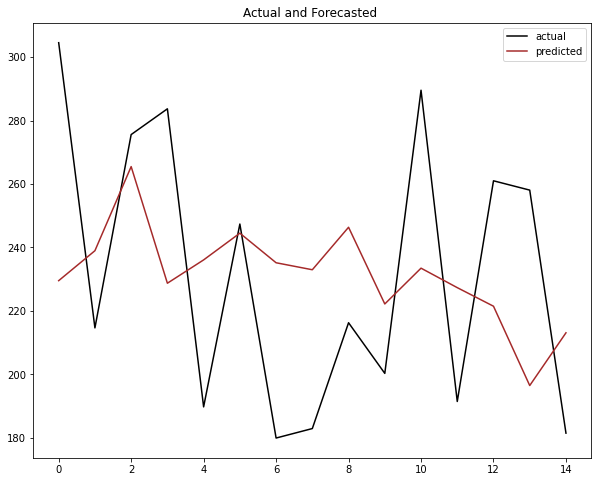

In [17]:
fun1(train, test, 1, 0, 2)

#### SARIMA

In [18]:
checkstationarity(d_seasonal)

0.0


'Data is Stationary. Proceed to moedl building'

#### For Seasonal Data

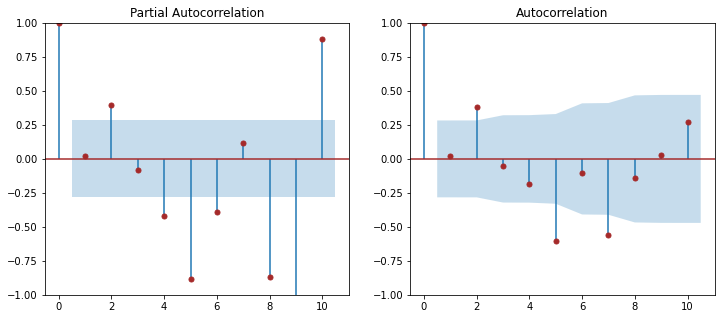

In [19]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plot_pacf(d_seasonal, lags = 10, ax = ax[0], color = 'brown');  
plot_acf(d_seasonal, lags = 10, ax = ax[1], color = 'brown');

# Tried with multiple lag sizes like 20,30,40,10 it shows so many p and q values that why considering lags as only 8

In [20]:
# p = 7
# q = 2

In [21]:
def fun1(data,data1,p,d,q,P,D,Q):
    #print(test)
    m1 = SARIMAX(data, order = (p,d,q), seasonal_order = (P,D,Q,7)).fit()
    global mse1
    f1 = m1.forecast(len(data1))
    mse1 = mean_squared_error(data1, f1)
    
    return 

In [22]:
p = [0]
d = [0]
q = [0,1,2,3,4,5]
P = [0,1,2]
D = [0]
Q = [0,1]
ps = []; ds = []; qs = [];
RMSE = []; Ps = []; Ds = []; Qs = [];

for i in range(len(p)):
    for j in range(len(d)):
        for k in range(len(q)):
            for l in range(len(P)):
                for m in range(len(D)):
                    for n in range(len(Q)):
                        ps.append(p[i]); ds.append(d[j]); qs.append(q[k]); Ps.append(P[l]); Ds.append(D[m]); Qs.append(Q[n]); RMSE.append(round(np.sqrt(mse1),3))
                        fun1(train, test, p = p[i], d = d[j], q = q[k], P = P[l], D = D[m], Q = Q[n])
                        #print('p='+str(p[i])+'  d='+str(d[j])+'  q='+str(q[k])+' P='+str(P[l])+'  D='+str(D[m])+'  Q='+str(Q[n])+'  Rmse={}'.format(round(np.sqrt(mse1),3)))

In [23]:
sari = pd.DataFrame(list(zip(ps,ds,qs,Ps,Ds,Qs,RMSE)), columns = ['p','d','q','P','D','Q','RMSE'])
sari.sort_values(by = ['RMSE']).head(1)

,p,d,q,P,D,Q,RMSE
0,0,0,0,0,0,0,44.147


In [24]:
s1 = SARIMAX(train, order = (1,0,2), seasonal_order = (1,0,2,7)).fit()

In [25]:
f1 = s1.forecast(len(test))
f1

2016-10-31    224.055525
2016-11-30    212.789472
2016-12-31    229.645217
2017-01-31    244.773927
2017-02-28    220.555249
2017-03-31    223.250040
2017-04-30    250.545516
2017-05-31    253.028906
2017-06-30    231.764316
2017-07-31    229.484161
2017-08-31    208.118610
2017-09-30    222.387187
2017-10-31    205.199258
2017-11-30    223.991485
2017-12-31    230.378812
Freq: M, Name: predicted_mean, dtype: float64

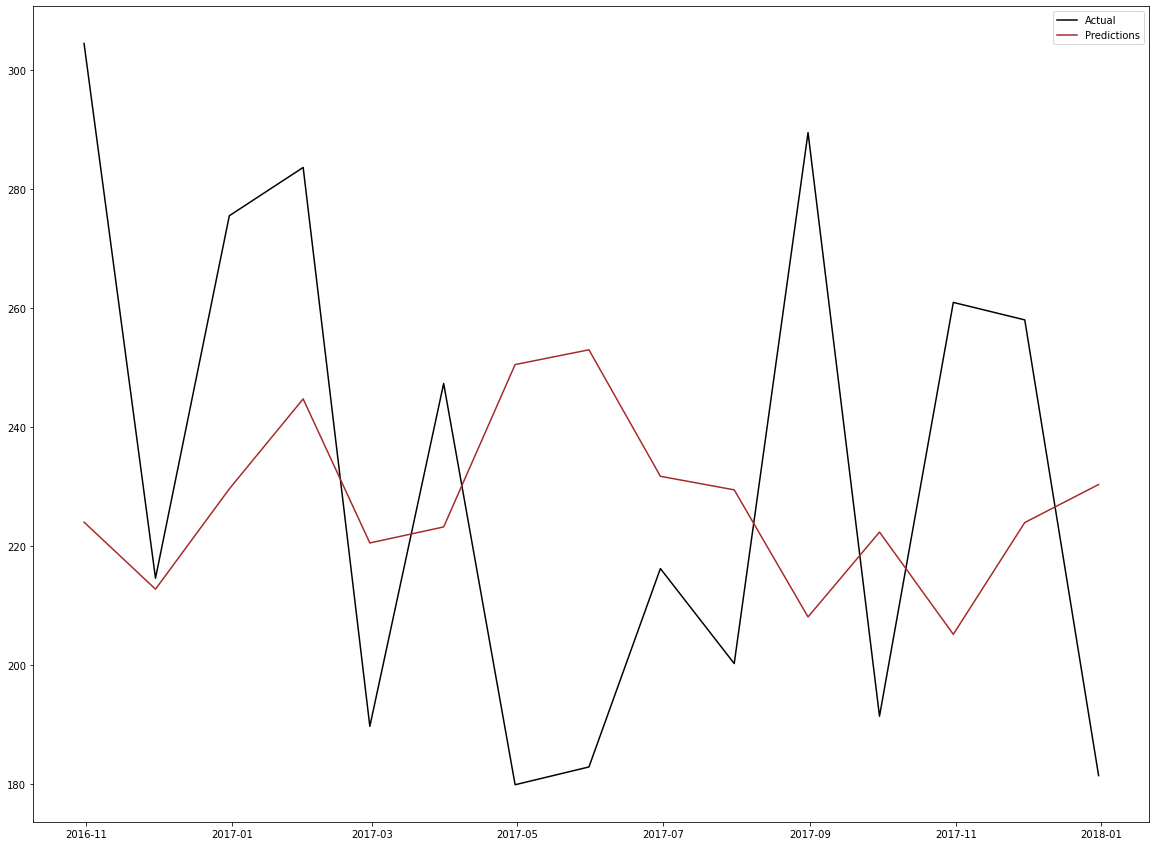

In [26]:
plt.figure(figsize = (20,15))

plt.plot(test, 'r', label = 'Actual', color = 'black')
plt.plot(f1, 'b', label = 'Predictions', color = 'brown')
plt.legend()
plt.show()

In [27]:
mse2 = mean_squared_error(test, f1)
print('RMSE for SARIMA: ' + str(np.sqrt(mse2)))

RMSE for SARIMA: 49.59271359033684


#### Sarimax Model

In [28]:
smx = int(len(df_resample)*0.7)
traint = df_resample[:smx]
testt = df_resample[smx:]
print('train = {}, test = {}'.format(len(traint),len(testt)))

train = 33, test = 15


In [29]:
def fun2(data,data1,p,d,q,P,D,Q):
  
    exog_train = traint[['Quantity','Discount','Profit']]
    exog_test = testt[['Quantity','Discount','Profit']]
    #print(test)
    m1 = SARIMAX(data, order = (p,d,q), seasonal_order = (P,D,Q,7), exog = exog_train.values).fit()
    global mse1
    f1 = m1.forecast(len(data1), exog = exog_test.values)
    mse1 = mean_squared_error(data1,f1)
    return 

In [30]:
p = [0]
d = [0]
q = [0,1,2,3,4,5]
P=[0,1,2]
D=[0]
Q=[0,1]
px=[];dx=[];qx=[];
RMSE=[];Px=[];Dx=[];Qx=[];

for i in range(len(p)):
     for j in range(len(d)):
        for k in range(len(q)):
             for l in range(len(P)):
                for m in range(len(D)):
                     for n in range(len(Q)):
                        px.append(p[i]);dx.append(d[j]);qx.append(q[k]);Px.append(P[l]);Dx.append(D[m]);Qx.append(Q[n]);RMSE.append(round(np.sqrt(mse1),3))
                        fun1(train,test,p=p[i],d=d[j],q=q[k],P=P[l],D=D[m],Q=Q[n])

In [31]:
exog_train = traint[['Quantity','Discount','Profit']]
exog_test = testt[['Quantity','Discount','Profit']]

sm2 = SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,7),exog=exog_train.values).fit()

In [32]:
f2 = sm2.forecast(len(test), exog = exog_test.values)
f2.head()

2016-10-31    195.624828
2016-11-30    243.263180
2016-12-31    213.996027
2017-01-31    235.412492
2017-02-28    240.132141
Freq: M, Name: predicted_mean, dtype: float64

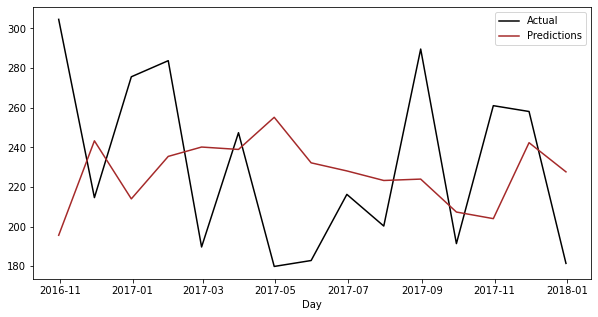

In [33]:
plt.figure(figsize=(10,5))
plt.plot(test, 'r', label = 'Actual', color = 'black')
plt.plot(f2, 'b', label = 'Predictions', color = 'brown')
plt.xlabel('Day')
plt.legend()

In [34]:
mse2 = mean_squared_error(test,f2)
print('RMSE for SARIMAX: ' + str(np.sqrt(mse2)))

RMSE for SARIMAX: 51.863289849797304


RMSE for ARMA = 85.384,
RMSE for SARIMA = 84.94115783252957,
RMSE for SARIMAX = 74.18427196435213

In [35]:
print("Conclusion : \nRMSE value for ARIMA = 85.384, \nRMSE value for SARIMA = 84.94115783252957, \nRMSE value for SARIMAX = 74.18427196435213")

Conclusion : 
RMSE value for ARIMA = 85.384, 
RMSE value for SARIMA = 84.94115783252957, 
RMSE value for SARIMAX = 74.18427196435213


In [36]:
print('RMSE value of SARIMAX is lower than the RMSE value of ARMA and SARIMA')

RMSE value of SARIMAX is lower than the RMSE value of ARMA and SARIMA


Interpretations :
* Firstly imported all the libraries and read the data 
* converted order date as index
* Resampled the sales column
* after that did a seasonal decompose and plotted a graph for it
* then splitted the data into 70:30 ratio as train and test for sales
* then, I have checked for stationarity for both train and test
* both train and test data are stationary
* then plotted the graph for ACF and PACF
* constructed the model for ARMA
* and predicted the sales test data
* also build and summarised the model and plotted the graph
* I have build the ARIMA model
* summarized and forecasted the model
* I have build the SARIMA model
* Predicted the values of sales using test data
* forecasted the value of the model
* plotted a graph for actual and predicted values
* I have build the SARIMAx model
* Predicted the values of sales using test data
* forecasted the value of the model
* plotted a graph for actual and predicted values